<a href="https://colab.research.google.com/github/EunSeo0117/DeepLearningData/blob/main/cnn%EC%9D%84%20%ED%99%9C%EC%9A%A9%ED%95%9C%20%EA%B0%80%EC%9C%84%EB%B0%94%EC%9C%84%EB%B3%B4%20%EA%B2%8C%EC%9E%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **데이터 패턴인식 DeepLearning Programming 과제**

---  


**학번 :**  
**이름 : 한은서**  

---



## **주제: CNN인식을 통한 가위바위보 구별 모델**

## **프로젝트의 motivation(동기)**
저는 데이터패턴인식 수업중 가장 재미있게 해봤던 실습이 CNN을 기반으로한 MNIST글자구별 실습이었습니다. 그래서 CNN관련된 주제로 물체를 인식해내는 프로젝트를 하고싶다고 생각했습니다. CNN은 이미지인식에 유리하기때문에 저는 더 나아가 웹캠을 통해서 실시간으로 물체를 인식할수있는 요소를 프로젝트에 추가하고싶다고 생각했습니다.
(하지만 코랩에선 OpenCV웹캠이 작동되지 않아서 Javascript의 웹캠 이미지 캡쳐 기능으로 대체했습니다.)  
데이터를 직접 구해야하기때문에 제가 생각한 주제는 가위바위보게임을 인식하여 사람의 손모양을 보고 가위인지, 바위인지, 보자기인지 구별해내는 모델을 주제로 결정하게되었습니다.가위바위보 주제는 손모양을 필요로 하기때문에 상대적으로 데이터를 구하기가 쉬웠고, 간단한 이미지 분류 문제이지만, CNN의 핵심 개념들을 전부 담고있고, 그 개념을 이해해서 적용해야하는 실습이라 공부를 하는데 큰 도움이 되는 주제라고 생각했습니다.  
또한, 과제는 가위바위보를 인식해내는것 뿐이지만, 이 주제를 응용하여 나중에는 수화를 손으로 표현했을때 그것을 인식해서 텍스트로 번역해주는 모델을 만들어 청각장애를 가진사람과 일반인이 자유롭게 소통할수있는 도구를 만들고싶다는 생각을 가지게되었습니다.

##**프로그램의 데이터 패턴 종류**  


*   딥러닝 프로젝트에 사용한 데이터의 종류는 '이미지데이터' 입니다.
*   딥러닝 모델은 이미지인식에 유리한 CNN모델을 사용했습니다.




## **데이터 수집 과정 및 augmentation 사용 기술(데이터확대, 증가기술)**  

#### **데이터 수집 과정**
*   다양한 데이터를 수집하기 위해서 가족, 지인, 친구들의 손사진을 골고루 수집했습니다.
*   각 주먹,가위,보 손사진에 대해 정면에서 찍은사진, 측면에서 찍은 사진, 흔들린사진, 확대된사진, 손등사진, 손바닥사진 등 하나의 손에 대해 여러 각도와 방향에서 촬영을 했습니다.
*   조명의 밝기등을 다르게 조절하여 사진을 찍고, 뼈가 얇은손, 뼈가 굵은 손, 남자 손, 여자 손, 조금은 어두운 피부톤, 밝은 피부톤, 악세사리를 낀 손, 악세사리가 없는 손 등의 종류를 다양하게 수집하였습니다.
*   가위의 경우 검지와 엄지를 펴서 가위를 내는사람, 검지와 중지를 펴서 가위를 내는사람등의 방식이 두가지 존재하기 때문에 두가지 포즈를 모두 촬영하여 가위항목에 추가했습니다.  
*   최종적으로 가위바위보 이미지 데이터를 총 652개 수집했습니다.

#### **augmentation 사용 기술**  
데이터를 더욱 효과적으로 사용하기 위해 증강기법을 사용했습니다.  
horizontal_flip, vertical_flip로 수평수직반전을 주고,  
width_shift, height_shift를 통해 수평수직이동시키고,  
rotation_range를 통해 이미지를 회전시키고,    
zoom_range를 통해 확대및 축소를 진행하고,  
brightness_range로 밝기조절을 해주었습니다.  
그 이외의 기법들은 오히려 학습을 방해할수있을것같아 제외했습니다.  
  

그리고 해당 데이터 증강기법은 학습할때만 사용하기때문에 train셋에만 적용해주었습니다.

In [ ]:
# 데이터 증강 설정 => 데이터를 늘림(argumentation)
datagen = ImageDataGenerator(
    vertical_flip=True,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=20,
    zoom_range=0.2,
    brightness_range=(0.7, 1.3)
)

# 데이터 증강 적용 (학습 데이터에만 적용)
datagen.fit(X_train)

## **전이학습이나, 타인의 데이터를 추가한 경우, 그 데이터에 대한 설명**
데이터를 직접 수집하였고, 전이학습 하지 않았습니다.

## **데이터의 크기 및 개수, 용량, 데이터 크기의 타당성 (딥러닝 가능성)**  
**수집 데이터 정보**
*   데이터의 각 크기는 휴대폰으로 촬영한 1050 * 1400 사이즈입니다.  
(학습할때는 사진이 너무 크기 떄문에 105*140으로 줄여서 사용했습니다.)  
*   총 데이터 갯수는 600개 입니다.  
*   용량은 각 사진당 343KB 정도이며 총 205MB입니다.   

**데이터 크기의 타당성**  
*   초기에는 100장의 사진으로 학습을 진행하였으나, 가끔씩 튀는 부분이 생겨서 500장을 추가하여 학습을 진행했습니다. 학습데이터의 양은 많을수록 좋지만, 하나의 손 정보에 치우쳐서 학습되는것을 방지하기 위해 다양한 손사진을 수집하다보니 대량의 데이터를 수집하는데에는 한계가 있었고, 그래서 600장으로 학습을 하게 되었습니다.
*   사진의 사이즈를 105*140으로 줄인건, 손모양을 식별하는 모델이므로 아주 미세한 부분까지 분석해야할 필요성이 없다고 생각했고, 이미지 데이터의 각픽셀을 RGB값으로 변환하여 사용하다보니, 기존사이즈(1050x1400) 로 학습시 벡터가 너무 커져서, 모델의 학습과정이 너무오래걸리고, 용량이 매우 방대해지는것을 우려하여 10배줄인 사이즈로 학습하기로 결정했습니다.  


## **본인의 딥러닝 프로그래밍에 대한 자세한 설명 (딥네트웍 구조 등)**

#### **과제수행단계**

1.   데이터 전처리
2.   모델 학습
3.   결과분석
4.   모델 테스트
5.   모델 응용



#### **1. 데이터 전처리**
가장 처음 한것은 깃허브에 업로드한 데이터들을 불러와 전처리하는 과정입니다.  
데이터 프레임을 생성하여 이미지 경로와 라벨(주먹,가위,보)로 저장했습니다.  
ready_data()함수는 이미지를 읽어와 각픽셀을 RGB값으로 변환해서 리스트에 저장합니다.  
setting_image()함수는 저장된 이미지들을 같은 사이즈(105*140)로 통일시키고,정규화과정을 거쳐 사진의 각 픽셀값을 0~1사이의 값으로 변환해주는 역할을 합니다.  




In [ ]:
# 데이터 셋팅
def sam_path_class(df):
  encoder = LabelEncoder()
  y = encoder.fit_transform(df['class'].astype('str'))
  path_n_class = list(zip(df['img_path'].tolist(), y))
  print(encoder.classes_)
  return path_n_class, encoder.classes_

# 이미지 크기설정 및 정규화
def setting_image(image, target_width=105 , target_height=140): # 사진프레임이 너무 커서 줄였다.
  image = cv2.resize(image, (target_width, target_height))
  return image.astype(np.float64) / 255.0 # 255로 나눠 0~1값으로 정규화함

# 이미지 픽셀화
def ready_data():
  df = pd.read_pickle("/content/DeepLearning/dataframe.pkl")
  path_n_class, class_names = sam_path_class(df)

  images = []
  names = []
  for path, label in path_n_class:
    img_tmp = cv2.imread(path,1)
    img = cv2.cvtColor(img_tmp, cv2.COLOR_BGR2RGB) # cv2는 RGB순이 아닌BGR순으로 인식 matplotlib를 쓰기위해 RGB순서로 변경
    images.append(img) # 이미지를 불러와 리스트에 저장하고, 이름을 저장한다.
    names.append(path.split('/')[-1])

  img_rgb_datas = np.array([setting_image(image) for image in images]) # 이미지크기 조절및 정규화과정을 여기서 호출한다.
  class_rsps = np.array([rsp for path, rsp in path_n_class])
  return img_rgb_datas, class_rsps, names, class_names


전처리한 데이터들을 학습셋과 테스트 셋으로 분리한후,  
학습셋의 갯수와 테스트셋의 갯수를 출력해 확인했습니다.

In [ ]:
# 모델 학습셋, 테스트 셋으로 분리
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle=True)

# 전처리한 데이터 확인
print("[학습셋과 테스트셋의 갯수확인 출력문]")
print("학습셋 이미지수: %d개" % (X_train.shape[0]))
print("테스트셋 이미지수: %d개" % (X_test.shape[0]))

그외에도 데이터 증강기법 적용, 데이터증강및 사이즈조절이 반영된 첫번째 학습이미지 출력, class값 원핫인코딩등을 수행했습니다.

#### **2. 모델 학습**  
#### 모델학습에 사용한 딥러닝구조는 **CNN**입니다.
*   **첫번쨰 합성곱과 풀링층**   
첫번쨰 입력층 합성곱은 32개의 3*3커널을 사용하여 특징맵을 생성하고, input_shape을 전처리과정에서 바꾼 이미지 사이즈로 입력했습니다.(높이140, 넓이 105, 채널 3)   
MaxPooling은 5x5를 사용해 특징맵을 다운샘플링 했습니다. 맥스풀링을 3x3이 아닌 5x5로 설정한 이유는 맥스풀링이 작을수록 모델학습시  배치와 에폭, 학습률등을 수정해도 정확도가 개선되지 않아서, 여러 시행착오를 거쳐 맥스풀링을 늘리는 방법으로 정확도를 개선했습니다.  
Dropout은 25%를 설정해서 뉴런을 무작위로 비활성화하여 과적합을 방지햇습니다.
*   **두번째 합성곱 및 풀링층**  
64개의 3*3커널을 사용하였습니다. 첫번째 합성곱과 같은 작업을 반복합니다. 맥스풀링과 드랍아웃도 동일합니다.
*  **결합층**  
Flatten을 통해서 다차원 배열을 1차원으로 변환하고, Dense레이어에서 128개의 뉴런을 가지도록 하고, 드랍아웃을 50%로 설정했습니다.  
마지막 출력층에서는 가위,바위,보 3가지의 경우가 있으므로 뉴런을 3으로 설정하고, 분류모델이므로 마지막층 활성화함수를 softmax로 설정해 각클래스확률을 출력했습니다.


In [ ]:
# 모델 설정

# < 학습 결과 기록 >
# 커널 3*3 , 맥스풀링 2*2 = 0.6 ~ 0.8 정확도
# 커널 3*3 , 맥스풀링 3*3 = 0.6 ~ 0.8 정확도
# 커널3*3 , 맥스풀링 5*5 = 0.8 ~ 0.9 정확도
# 맥스풀링을 키우는게 정확도가 더 높아짐.

# 사진의 세세한 특성보다 전체적인 모형을 보고 주먹가위보를 분류하는것이 더 효과적이라 맥스풀링을 키운게
# 효과적인 결과를 가져왔다.

model_CNN = Sequential()
model_CNN.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(140, 105, 3)))
model_CNN.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model_CNN.add(MaxPooling2D(pool_size=(5, 5)))
model_CNN.add(Dropout(0.25))

model_CNN.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_CNN.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_CNN.add(MaxPooling2D(pool_size=(5, 5)))
model_CNN.add(Dropout(0.25))

model_CNN.add(Flatten())
model_CNN.add(Dense(128, activation='relu'))
model_CNN.add(Dropout(0.5))
model_CNN.add(Dense(3, activation='softmax')) # 분류모델이므로 마지막 활성화함수는 softmax를 사용한다.
model_CNN.summary()

*   **Compile**  
compile에서는 3가지 종류중 한개를 분류해 내는 다중뷴류모델이므로 손실함수를 categorical_crossentropy로 설정하고,  
옵티마이저는 'adam'을 사용했습니다.  
모델성능을 평가하기 위해 metrics['accuracy']를 사용했습니다.
*   **최적화및 과적합 방지**  
모델을 저장하는 경로를 설정하고, 가장 좋은 모델을 저장하기 위해 ModelCheckpoint와 EarlyStoping을 추가했습니다. 가장 최선의 모델만을 저장하고, 모델이 5회동안 개선이 되지 않을시 종료되도록 patience를 5으로 설정했습니다.  
또한 학습률을 조정하기위해 ReduceLROnPlateau를 추가했습니다. 검증손실이 3회이상 개선되지 않으면 학습률이 0.2씩 줄어듭니다.
*   **history**  
학습셋과 검증셋으로 분류하고, 검증셋은 학습셋의 25%를 사용했습니다.  
epochs는 100번으로, batch_size는 64로 설정했습니다. 에폭과 배치사이즈를 여러번 변경시키며 최적의 수를 찾아내는 과정에서 결국 에폭100과, 배치 64가 가장 좋은 결과를 가져왔기에 선택했습니다.   
callback의 조기종료, 최적모델저장, 학습률감소를 통해 성능을 개선합니다.  

In [ ]:
# 모델 실행환경 설정
# 3종류중 한개를 분류해내는것이므로 categorical_crossentropy를 사용한다.
model_CNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# 최적화(과적합방지)
modelpath_CNN = "/content/DeepLearning/RSP_cnn.hdf5"
checkpointer_cnn = ModelCheckpoint(filepath=modelpath_CNN, monitor='val_loss', verbose=1,
                                   save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)
redu_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)


# 모델 실행
# < 학습결과 기록 >
# 기본: 배치200, 에폭30 (80%) / 배치 250, 에폭 35 (85%) / 배치270, 에폭 35 (80%) / 배치64, 에폭 100 (90%)
history_CNN = model_CNN.fit(X_train, y_train, validation_split=0.25, epochs=100,
                            batch_size=64, verbose=1, callbacks=[early_stopping_callback, checkpointer_cnn,redu_lr])

print("\n CNN Model Test Accuracy: %.4f" % (model_CNN.evaluate(X_test, y_test)[1]))

## **결과에 대한 충분한 분석과 설명 (도표나, 결과 화면을 캡춰해서 제시)**

#### **3. 결과 분석**  
(아래 그래프와 혼돈행렬은 모델학습을 할때마다 조금씩 다르게 나옵니다!)  

*   **학습셋과 검증셋 오차그래프**  
학습결과를 확인하기 위해 검증셋과 학습셋의 오차를 저장하여 그래프로 표현했습니다.  
아래 사진은 **초기 모델**의 그래프입니다.  
<img src='https://drive.google.com/uc?export=download&id=1dzEEZysFYOcGn3N_3uuATOlX61JlMYqk' width="" height ="" /><br>
초기모델은 학습과 검증에 다소 차이가 있습니다.  
  다음은 개선한 **최종모델**의 그래프입니다.  
<img src='https://drive.google.com/uc?export=download&id=1OOeydXcxvvdOEsj_B1kMvidOWOgWcRs3' width="" height ="" /><br>  
해당 그래프를 보면, 학습과 검증이 큰 오차없이 잘 이루어졌습니다. 이전에 맥스풀링변경, 배치사이즈 조절하기 이전에는 학습셋과 검증셋의 간격이 너무 커지고, 모델이 인식을 잘 못하는 문제가 있었지만, 최종 그래프에서는 학습과 검증이 잘 이뤄지는것처럼 보입니다.  


*   **혼돈행렬을 통한 결과 분석**  
그래프만으로는 어느부분에서 분류를 실패하는지, 어느부분을 개선해야하는지 정확하게 알수없습니다.  
그래서 혼돈 행렬을 사용하여, 모델이 테스트셋을 각각 어느항목으로 분류했고, 어느항목을 잘못분류해냈는지를 정확하게 확인할수있도록 구성했습니다.  
아래 사진은 **초기 모델**의 혼돈행렬 사진입니다.  
<img src='https://drive.google.com/uc?export=download&id=1uwtK0l0aaTrFkYDaYQ7Fu5SBHwLgOr4a' width="" height ="" /><br>
초기 모델은 실패가 많고, 인식을 못하는 정도가 높습니다.  
다음은 개선한 **최종모델**의 혼돈행렬 사진입니다.  
<img src='https://drive.google.com/uc?export=download&id=1VMGq3QOjPmFmsZtqdet_F5291Xpg3Gal' width="" height ="" /><br>

비교적 정확하게 분류를 해내고 있으므로 학습이 잘 이루어진것을 알수있습니다.

#### **4. 모델 사용**
*   **실제 사진을 넣어서 테스트하기**  
모델학습을 통해 얻은 최적의 모델을 가지고, 실제 테스트를 진행합니다.  
이때, 학습셋, 테스트셋에 사용했던 데이터를 사용하는게 아니라 따로 real_test_data 폴더에 저장해둔 완전 새로운 데이터를 가져와 대입하고, 가위,바위,보를 잘인식하는지 확인합니다.  
<img src='https://drive.google.com/uc?export=download&id=11uQf3ywTLxCYNxcLZEURbIAABPPelzoz' width="" height ="" /><br>    
결과를 보면 알맞게 예측해낸모습을 볼수있습니다.


#### **5. 모델 응용**  
모델 제작과 더불어 추가로 한것은 웹캠을 통해 찍은 사진을 모델이 인식해내는지 확인하는 테스트 입니다. 코랩에서는 OpenCV 웹캠을 실행시킬수 없기 떄문에 javascript의 웹캠 캡쳐 방식으로 사진을 실시간으로 찍고, 찍은 사진을 모델에 넣어 인식해내는지 확인하는 응용을 시도했습니다.

웹캠 실행시 화면입니다. 가위바위보를 화면에 제시하고 상단의 capture버튼을 통해 사진을 촬영합니다.
<img src='https://drive.google.com/uc?export=download&id=1CryGuVwZYhr37uU7ZWc8pH_02p_56R_a' width="" height ="" /><br>
웹캠을 통해 찍은 사진을 분석한 결과입니다.  
<img src='https://drive.google.com/uc?export=download&id=1hs0NanPRqmeCqX8tMH4TGWgfwPkWwlyp' width="" height ="" /><br>
정확하게 가위로 인식했습니다.  
하지만, 웹캠으로 찍은 사진은 변수가 많아 인식을 못하는 경우도 많습니다.  
#### **(컴퓨터장치에 캠을 켜는 기능이 없으면 작동되지 않을수있습니다.)**

## **실행 코드(!!!이 코드를 실행해주세요!!!)**  
아래는 위 설명을 전부합친 전체 코드입니다. 이 코드를 실행하시면 학습과정을 확인하실수있습니다.

fatal: destination path 'DeepLearningData' already exists and is not an empty directory.
['paper' 'rock' 'scissors']
[학습셋과 테스트셋의 갯수확인 출력문]
학습셋 이미지수: 480개
테스트셋 이미지수: 120개
[데이터 argumentation 확인을 위한 출력문]


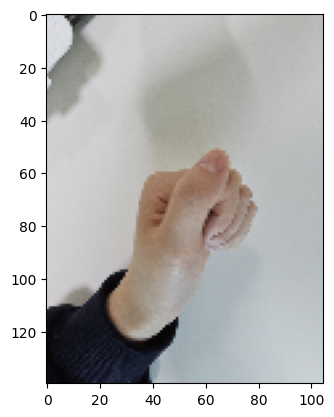

[인코딩 확인을 위한 출력문]
인코딩 전 class : 1 
인코딩 후 class :  [0. 1. 0.]
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 138, 103, 32)      896       
                                                                 
 conv2d_53 (Conv2D)          (None, 136, 101, 32)      9248      
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 27, 20, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_39 (Dropout)        (None, 27, 20, 32)        0         
                                                                 
 conv2d_54 (Conv2D)          (None, 25, 18, 64)        18496     
                                                                 
 conv2d_55 (Conv2D)          (None, 23, 16, 64)        3692

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/6 [========================>.....] - ETA: 0s - loss: 1.1059 - accuracy: 0.3094
Epoch 2: val_loss did not improve from 1.09270
6/6 [==============================] - 0s 60ms/step - loss: 1.1018 - accuracy: 0.3250 - val_loss: 1.0976 - val_accuracy: 0.2917 - lr: 0.0010
Epoch 3/100
5/6 [========================>.....] - ETA: 0s - loss: 1.0817 - accuracy: 0.4094
Epoch 3: val_loss improved from 1.09270 to 1.08856, saving model to /content/DeepLearningData/RSP_cnn.hdf5
6/6 [==============================] - 0s 61ms/step - loss: 1.0831 - accuracy: 0.4028 - val_loss: 1.0886 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 4/100
5/6 [========================>.....] - ETA: 0s - loss: 1.0925 - accuracy: 0.3656
Epoch 4: val_loss did not improve from 1.08856
6/6 [==============================] - 0s 60ms/step - loss: 1.0903 - accuracy: 0.3750 - val_loss: 1.0910 - val_accuracy: 0.3583 - lr: 0.0010
Epoch 5/100
5/6 [========================>.....] - ETA: 0s - loss: 1.1023 - accuracy: 0.3656
Epoch 5: val_los

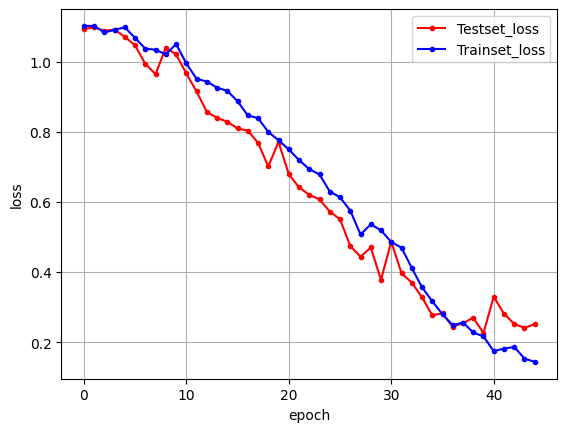

4/4 [==============================] - 0s 8ms/step


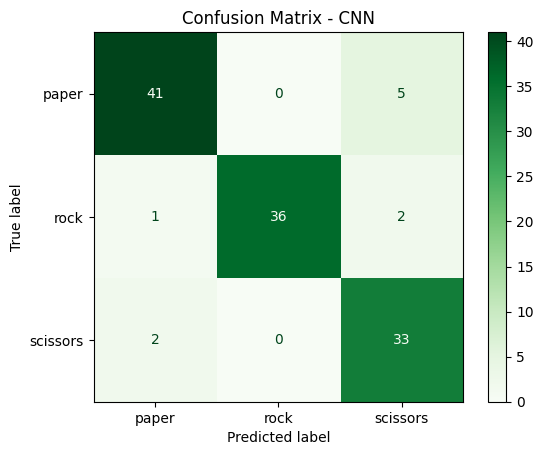

CNN Model Accuracy: 0.9167
1/1 [==============================] - 0s 25ms/step


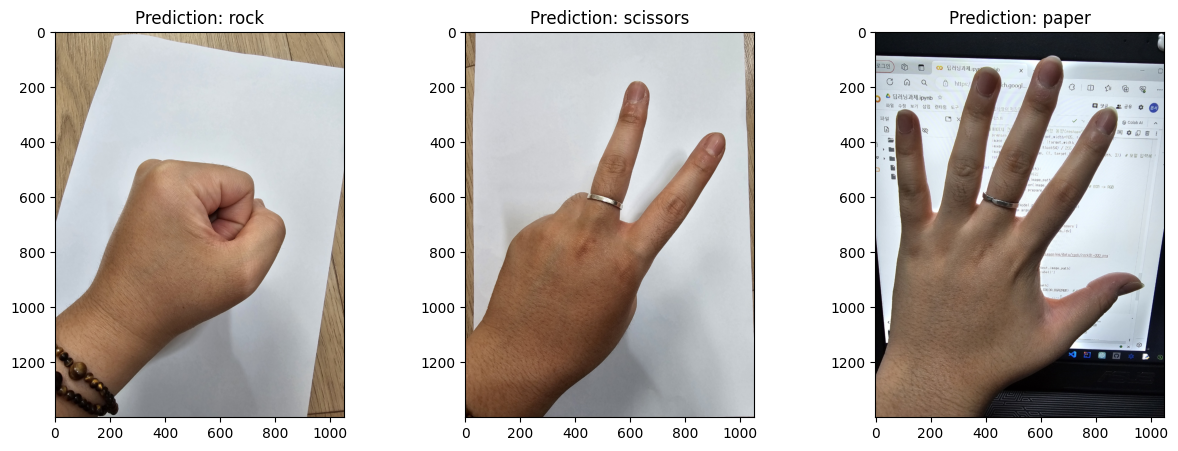

<IPython.core.display.Javascript object>

Save to /content/DeepLearningData/real_test_data/photo.jpg
1/1 [==============================] - 0s 24ms/step
Predicted label: paper


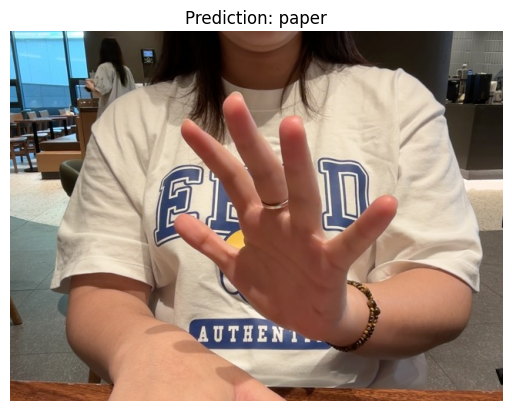

In [ ]:
from os.path import split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import pickle,cv2
import sys

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode


# ===================================== 데이터 전처리 =====================================
# 깃허브에서 이미지 불러오기
!git clone https://github.com/EunSeo0117/DeepLearningData.git

# 데이터 프레임 생성(경로, 라벨)
img_root = '/content/DeepLearningData/data/'
labels = [f for f in os.listdir(img_root)]
image_list = []
label_list = []

for label in labels:
  folder_path = '{}{}{}'.format(img_root, label, '/')
  for f in os.listdir(folder_path):
    image_path = '{}{}'.format(folder_path,f)
    image_list.append(image_path)
    label_list.append(label)

#print(len(image_list), len(label_list))
df = pd.DataFrame({'img_path':image_list, 'class':label_list})
df.head()

# 데이터프레임 저장
df.to_pickle("/content/DeepLearningData/dataframe.pkl")

# 데이터 셋팅
def sam_path_class(df):
  encoder = LabelEncoder()
  y = encoder.fit_transform(df['class'].astype('str'))
  path_n_class = list(zip(df['img_path'].tolist(), y))
  print(encoder.classes_)
  return path_n_class, encoder.classes_

# 이미지 크기설정 및 정규화
def setting_image(image, target_width=105 , target_height=140): # 사진프레임이 너무 커서 줄였다.
  image = cv2.resize(image, (target_width, target_height))
  return image.astype(np.float64) / 255.0 # 255로 나눠 0~1값으로 정규화함

# 이미지 픽셀화
def ready_data():
  df = pd.read_pickle("/content/DeepLearningData/dataframe.pkl")
  path_n_class, class_names = sam_path_class(df)

  images = []
  names = []
  for path, label in path_n_class:
    img_tmp = cv2.imread(path,1)
    img = cv2.cvtColor(img_tmp, cv2.COLOR_BGR2RGB) # cv2는 RGB순이 아닌BGR순으로 인식 matplotlib를 쓰기위해 RGB순서로 변경
    images.append(img) # 이미지를 불러와 리스트에 저장하고, 이름을 저장한다.
    names.append(path.split('/')[-1])

  img_rgb_datas = np.array([setting_image(image) for image in images]) # 이미지크기 조절및 정규화과정을 여기서 호출한다.
  class_rsps = np.array([rsp for path, rsp in path_n_class])
  return img_rgb_datas, class_rsps, names, class_names

# 함수호출 및 데이터 전처리
img_rgb_datas, class_rsps, names, class_names = ready_data()
np.savez("/content/DeepLearningData/dataset_npz.npz", x = img_rgb_datas, y= class_rsps)

# 전처리한 데이터 학습셋과 테스트셋으로 불러오기
data = np.load("/content/DeepLearningData/dataset_npz.npz")
X = data['x']
y = data['y']

# 모델 학습셋, 테스트 셋으로 분리
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle=True)

# 전처리한 데이터 확인
print("[학습셋과 테스트셋의 갯수확인 출력문]")
print("학습셋 이미지수: %d개" % (X_train.shape[0]))
print("테스트셋 이미지수: %d개" % (X_test.shape[0]))

# 데이터 증강 설정 => 데이터를 늘림(argumentation)
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    brightness_range=(0.7, 1.3),
    vertical_flip=True,
    horizontal_flip=True
)

# 데이터 증강 적용 (학습 데이터에만 적용)
datagen.fit(X_train)

# 첫번째 이미지 (데이터 증강, 사이즈조절등이 잘 되었는지 확인함.)
print("[데이터 argumentation 확인을 위한 출력문]")
plt.imshow(X_train[0], cmap='Greys')
plt.show()

# 원핫인코딩(바이너리화)
# 0 = paper, 1 = rock, 2 = scissors
print("[인코딩 확인을 위한 출력문]")
print("인코딩 전 class : %d " % (y_train[0])) # 인코딩 전

y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

print("인코딩 후 class : " ,y_train[0]) # 인코딩 후


# ===================================== 모델 학습 =====================================
# 이제 CNN을 사용한 모델을 만든다. 이름은 model_CNN이다.

# 모델 설정
# 커널 3*3 =  0.8, 맥스풀링 2*2 / 커널 3*3 , 맥스풀링 3*3 = 0.8 /  커널3*3 , 맥스풀링 5*5 = 0.9
# 맥스풀링을 키우는게 정확도가 더 높아짐.
# 사진의 세세한 특성보다 전체적인 모형을 보고 주먹가위보를 분류하는것이 더 효과적이라 맥스풀링을 키운게
# 효과적인 결과를 가져왔다.
model_CNN = Sequential()
model_CNN.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(140, 105, 3)))
model_CNN.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model_CNN.add(MaxPooling2D(pool_size=(5, 5)))
model_CNN.add(Dropout(0.25))

model_CNN.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_CNN.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_CNN.add(MaxPooling2D(pool_size=(5, 5)))
model_CNN.add(Dropout(0.25))

model_CNN.add(Flatten())
model_CNN.add(Dense(128, activation='relu'))
model_CNN.add(Dropout(0.5))
model_CNN.add(Dense(3, activation='softmax'))
model_CNN.summary()
# 분류모델이므로 마지막 활성화함수는 softmax를 사용한다.

# 모델 실행환경 설정
model_CNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 3종류중 한개를 분류해내는것이므로 categorical_crossentropy를 사용한다.

# 최적화(과적합방지)
modelpath_cnn = "/content/DeepLearningData/RSP_cnn.hdf5"
checkpointer_cnn = ModelCheckpoint(filepath=modelpath_cnn, monitor='val_loss', verbose=1,
                                   save_best_only=True)
early_stopping_callback_cnn = EarlyStopping(monitor='val_loss', patience=5)
redu_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)

# 모델실행
# 기본: 배치200, 에폭30 / 배치 250, 에폭 35(85%) / 배치270, 에폭 35(80%) /
history_CNN = model_CNN.fit(X_train, y_train, validation_split=0.25, epochs=100,
                            batch_size=64, verbose=1, callbacks=[early_stopping_callback_cnn, checkpointer_cnn,redu_lr])

print("\n CNN Model Test Accuracy: %.4f" % (model_CNN.evaluate(X_test, y_test)[1]))

# 검증셋과 학습셋의 오차 저장
y_vloss_cnn = history_CNN.history['val_loss']
y_loss_cnn = history_CNN.history['loss']


# ===================================== 결과 분석 =====================================
# 그래프 표현
x_len_cnn = np.arange(len(y_loss_cnn))
plt.plot(x_len_cnn, y_vloss_cnn, marker='.', c='red', label='Testset_loss')
plt.plot(x_len_cnn, y_loss_cnn, marker='.', c='blue', label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

##### 혼돈행렬을 통한 결과 분석 #####
# 함수생성
def confusion_matrix_CNN(y_true, y_pred, classes, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Greens)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# 혼돈행렬 모델평가
y_test_classes = np.argmax(y_test, axis=1)
y_pred_cnn = model_CNN.predict(X_test)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)

# 혼돈행렬 표
confusion_matrix_CNN(y_test_classes, y_pred_cnn_classes, class_names, "CNN")

# 혼돈행렬 정확도 계산및 출력
accuracy_cnn = np.sum(y_pred_cnn_classes == y_test_classes) / len(y_test_classes)
print(f"CNN Model Accuracy: {accuracy_cnn:.4f}")


## ===================================== 모델 테스트 =====================================
#### 기본적인 사진인식 테스트 ####

# 모델 가져오기
model = load_model('./DeepLearningData/RSP_cnn.hdf5')

# 새이미지 전처리 함수 (위에거랑 동일(reshape만 추가됨))
def setting_image2(image, target_width=105 , target_height=140):
    image = cv2.resize(image, (target_width, target_height))
    image = image.astype(np.float64) / 255.0  # 정규화
    image = np.reshape(image, (1, target_height, target_width, 3))  # 모델 입력에 맞게 reshape
    return image

def predict_rsp(image_path): # 인식함수
    # 이미지 전처리
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR -> RGB
    processed_img = setting_image2(image)

    # 예측 수행
    predictions = model.predict(processed_img)
    class_index = np.argmax(predictions)

    # 클래스에 해당하는 라벨
    labels = ['paper', 'rock', 'scissors']
    predicted_label = labels[class_index]

    return predicted_label

# 예측해볼 예시 사진경로
real_test_image1 = '/content/DeepLearningData/real_test_data/KakaoTalk_20240522_163700777.jpg'
real_test_image2 = '/content/DeepLearningData/real_test_data/KakaoTalk_20240522_163700777_01.jpg'
real_test_image3 = '/content/DeepLearningData/real_test_data/test1.jpg'

# 예측 수행
predicted_label1 = predict_rsp(real_test_image1)
predicted_label2 = predict_rsp(real_test_image2)
predicted_label3 = predict_rsp(real_test_image3)

# 예측한 이미지 시각화
fig, ax = plt.subplots(1,3, figsize=(15,5))

image1 = cv2.imread(real_test_image1)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
ax[0].imshow(image1)
ax[0].set_title(f"Prediction: {predicted_label1}")

image2 = cv2.imread(real_test_image2)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
ax[1].imshow(image2)
ax[1].set_title(f"Prediction: {predicted_label2}")

image3 = cv2.imread(real_test_image3)
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
ax[2].imshow(image3)
ax[2].set_title(f"Prediction: {predicted_label3}")

plt.show()
# ===================================== 모델 응용 =====================================
# 실시간 웹캠 이미지 분류
# 실시간 웹캠으로 찍은 캡쳐 사진을 통해 주먹,가위,보를 식별해내는지 테스트한다.
# OpenCV의 웹캠은 코랩에서 실행불가능하므로 대체방법인 javascript를 사용한 웹캡쳐방식을 사용

# 웹캠환경 셋팅
def js_photo_mode(filename='/content/DeepLearningData/real_test_data/photo.jpg', quality=0.8):
  js = Javascript('''
  async function takePhoto(quality) {
    const div = document.createElement('div');
    const capture = document.createElement('button');
    capture.textContent = 'Capture';
    div.appendChild(capture);
    const video = document.createElement('video');
    video.style.display = 'block';
    const stream = await navigator.mediaDevices.getUserMedia({video: true});
    document.body.appendChild(div);
    div.appendChild(video);
    video.srcObject = stream;
    await video.play();
    google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
    await new Promise((resolve) => capture.onclick = resolve);
    const canvas = document.createElement('canvas');
    canvas.width = video.videoWidth;
    canvas.height = video.videoHeight;
    canvas.getContext('2d').drawImage(video, 0, 0);
    stream.getVideoTracks()[0].stop();
    div.remove();
    return canvas.toDataURL('image/jpeg', quality);
  }
  ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

# 웹캠 실행
def predict_rsp2(image):
    processed_img = setting_image2(image)
    predictions = model.predict(processed_img)
    class_index = np.argmax(predictions)
    labels = ['paper', 'rock', 'scissors']
    return labels[class_index]

try:
  filename = js_photo_mode()
  print("Save to {}".format(filename))
  img = cv2.imread(filename)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  predicted_label = predict_rsp2(img)
  print(f"Predicted label: {predicted_label}")

  plt.imshow(img)
  plt.title(f"Prediction: {predicted_label}")
  plt.axis('off')
  plt.show()
except Exception as e:
  print(str(e))
  print("웹캠 셋팅을 확인하세요!")


## **본 프로젝트를 통해 느낀점**  
프로젝트를 하는 과정에서 딥러닝에 대한 개념을 좀더 잘 이해할수있었습니다. 개념만 익혀 시험공부를 했던것과 달리, 과제를 하면서 배운내용을 사용해볼때는 개념을 보다 더 정확하게 이해하고, 더 나아가 각 요소들이 영향을 미치는 범위를 의식하는것이 중요하다고 느꼈습니다.  
배치 사이즈, 에폭, 맥스풀링, 컨볼루션층, 커널사이즈 등이 학습률에 얼마나 영향을 미치는지 정확도를 높일때 절대적인 방식이 없고, 모델의 특성을 파악해서 그에 맞게 변경해야하고, 무조건 좋은 코드라고 정확도를 반드시 높여주는것은 아니라는것을 인식했습니다.  
또한, 데이터를 수집하고, 전처리 하는 과정에서 어떤 데이터가 학습에 좋고, 안좋은지를 판단할수있었고, 원핫인코딩, 정규화과정에 대해 좀더 깊게 이해할수있었습니다.   

## **프로젝트 수행 과정에 대한 간략한 일정 고찰**  
2024.05.15 ~ 2024.05.20 : 데이터수집  
2024.05.20 ~ 2024.05.22: 데이터 전처리및 딥러닝 모델생성  
2024.05.23 ~ 2024.05.28 : 여러방법시도하며 정확도 올리기(배치사이즈, 맥스풀링등)  
2024.05.29 : 모델완성 및 최종테스트  
2024.05.30 : 보고서 작성 및 제출

## **프로젝트를 위해 활용한 자료나, 동영상 링크**  
*   데이터 패턴인식 강의자료
*   모두의 딥러닝 책
*   https://inhovation97.tistory.com/15
*   https://ivo-lee.tistory.com/91
*   https://data-panic.tistory.com/13
*   https://blog.insightdatascience.com/automl-for-data-augmentation-e87cf692c366
*   https://lcyking.tistory.com/entry/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%A6%9D%EA%B0%95Data-Augmentation
*   https://hyjykelly.tistory.com/16
*   https://colab.research.google.com/drive/1QnC7lV7oVFk5OZCm75fqbLAfD9qBy9bw
*   https://mingxoxo-record.tistory.com/26
*   https://velog.io/@subsub/%EB%94%A5%EB%9F%AC%EB%8B%9D-%EB%AA%A8%EB%8D%B8-%ED%95%99%EC%8A%B5%EC%9A%A9-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%9D%98-%EA%B8%B0%EB%B3%B8%EC%A0%81%EC%9D%B8-%EC%A0%84%EC%B2%98%EB%A6%AC-%EA%B3%BC%EC%A0%95